In [4]:
import os
os.getcwd()
os.chdir('C://Users//keseol//Desktop')

In [50]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [51]:
bike = pd.read_csv('day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254,0.227,0.653,0.350,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253,0.255,0.590,0.155,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253,0.242,0.753,0.124,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.256,0.232,0.483,0.351,364,1432,1796


In [52]:
data = bike[['cnt','temp']]
data.describe()

,cnt,temp
count,731.000,731.000
mean,4504.349,0.495
std,1937.211,0.183
min,22.000,0.059
25%,3152.000,0.337
50%,4548.000,0.498
75%,5956.000,0.655
max,8714.000,0.862


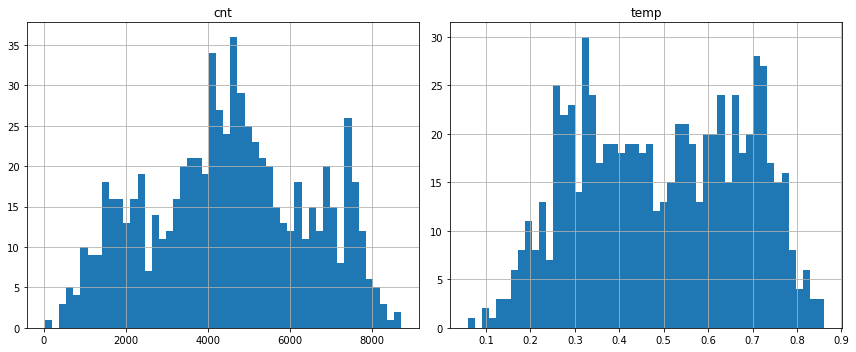

In [53]:
data.hist(bins=50, figsize=(12,5))
plt.tight_layout()

In [54]:
N = data.shape[0] # it means a dimension of our data.(row=0, col=1)
test = np.random.choice(np.arange(N), 20, replace=False)
train_df = data[~data.index.isin(test)].copy()
#'isin' takes a role to choose specific rows that contain an assigned value.
test_df = data[data.index.isin(test)].copy()
print(train_df.shape, test_df.shape)

(711, 2) (20, 2)


In [55]:
y = np.matrix(data['cnt']).T # .T = Transpose
x = np.matrix(data['temp']).T
y_train = np.matrix(train_df['cnt']).T
x_train = np.matrix(train_df['temp']).T
y_test = np.matrix(test_df['cnt']).T
x_test = np.matrix(test_df['temp']).T

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [57]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
x_train_poly.shape

(711, 3)

In [58]:
from sklearn.metrics import mean_squared_error
trainMSE, testMSE = [],[]
for i in np.arange(1, 13):
    poly = PolynomialFeatures(degree=i)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    lin = LinearRegression(fit_intercept=False)
    lin.fit(x_train_poly, y_train)
    trainMSE.insert(i-1,np.log(mean_squared_error(y_train,lin.predict(x_train_poly))))
    testMSE.insert(i-1, np.log(mean_squared_error(y_test, lin.predict(x_test_poly))))
print(trainMSE, testMSE)

[14.626379215345716, 14.534506021811719, 14.521594110374528, 14.521282309684004, 14.521165315383286, 14.521141733924166, 14.517564798466408, 14.515670296033328, 14.506334204084565, 14.505501970841324, 14.502395768106181, 14.502386981626533] [14.943552200628709, 14.493503369833286, 14.294546461460953, 14.31733651271619, 14.307917793387974, 14.309385778572247, 14.30755401782499, 14.293247128634347, 14.286442407632288, 14.284567930313788, 14.25809088052838, 14.255552468148256]


<function matplotlib.pyplot.legend(*args, **kwargs)>

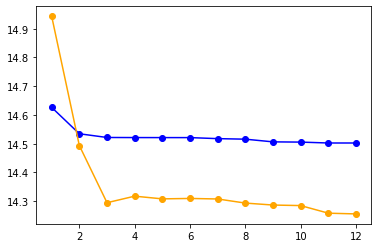

In [59]:
plt.plot(range(1,13),trainMSE, 'o-', color='blue', label='Train MSE')
plt.plot(range(1,13),testMSE, 'o-', color='orange', label='Test MSE')
plt.legend